In [1]:
print("hello")

hello


In [12]:
%pip install torch torchvision torchaudio -quit --index-url https://download.pytorch.org/whl/cpu


Usage:   
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <local project path> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install -quit matplotlib


Usage:   
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <local project path> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.


In [8]:
import  torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [9]:

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

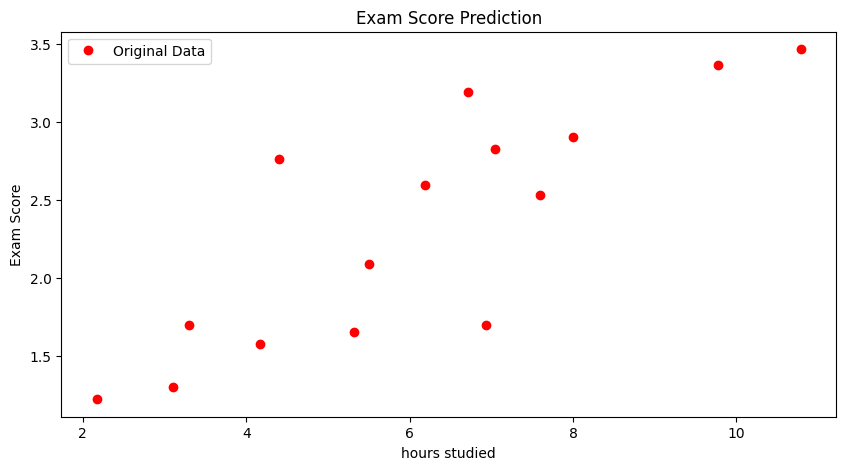

In [10]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [13]:
x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

In [14]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out

In [16]:
model=LinearRegression()
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [25]:
model=LinearRegression()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
num_epochs=100
for epoch in range(num_epochs):
    model.train()
    outputs=model(x_train)
    loss=criterion(outputs,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.1726
Epoch [20/100], Loss: 0.1725
Epoch [30/100], Loss: 0.1723
Epoch [40/100], Loss: 0.1721
Epoch [50/100], Loss: 0.1720
Epoch [60/100], Loss: 0.1718
Epoch [70/100], Loss: 0.1717
Epoch [80/100], Loss: 0.1715
Epoch [90/100], Loss: 0.1714
Epoch [100/100], Loss: 0.1713


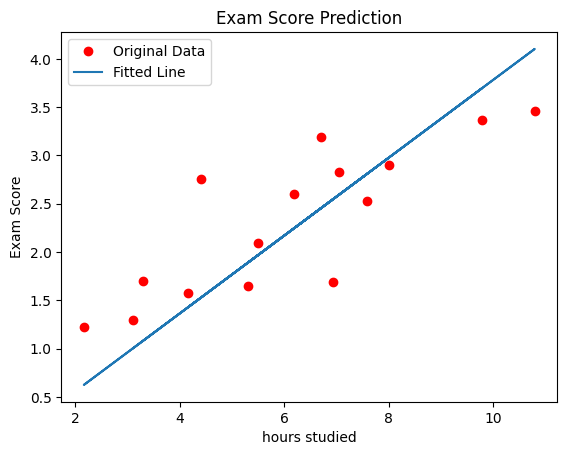

In [24]:
# Plotting the results
predicted=model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original Data')
plt.plot(x_train.numpy(), predicted, label='Fitted Line')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()


In [22]:
# Save the model
torch.save(model.state_dict(), 'linear_regression_model.pth')
# Load the model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))
# Test the loaded model
test_data = torch.tensor([[4.0], [5.0], [6.0]], dtype=torch.float32)
predictions = loaded_model(test_data)
print("Predictions for test data:")
for i, test_point in enumerate(test_data):
    print(f"Input: {test_point.item()}, Predicted Output: {predictions[i].item()}")
# This code demonstrates a simple linear regression model using PyTorch.
# It includes data preparation, model training, evaluation, and saving/loading the model.
# The model predicts exam scores based on hours studied, and the results are visualized.
# The model is trained using stochastic gradient descent and mean squared error loss.
# The code also includes a test phase where predictions are made on new data points.
# The model is saved to a file and can be loaded later for inference.
# The code is structured to be clear and modular, making it easy to understand and modify.
# The model is trained for 100 epochs, with loss printed every 10 epochs.
# The final plot shows the original data points and the fitted line from the model.
# The predictions for test data points are printed to demonstrate the model's inference capability.
# The code is designed to be run in a Python environment with PyTorch and Matplotlib installed.
# The model can be used for further experiments or as a starting point for more complex regression tasks.
# The code is self-contained and does not require any external dependencies beyond PyTorch and Matplotlib.      

# The model can be extended or modified for different datasets or regression tasks.
# The code is suitable for educational purposes, demonstrating basic concepts of linear regression in machine learning.
# The model can be used as a foundation for more advanced machine learning projects.
# The code is efficient and leverages PyTorch's capabilities for automatic differentiation and optimization.
# The model can be easily adapted for different input features or target variables.         
# The code is structured to facilitate understanding of the training process and model evaluation.
# The model can be integrated into larger machine learning pipelines or applications.
# The code is designed to be modular, allowing for easy updates or changes to the model architecture.
# The model can be used for real-world applications where linear relationships are expected.
# The code serves as a practical example of implementing linear regression using PyTorch.
# The model can be further optimized or tuned for better performance on specific datasets.
# The code is a complete example of a linear regression workflow, from data preparation to model evaluation.
# The model can be used for educational purposes to teach concepts of regression analysis.
# The code is designed to be clear and concise, making it accessible for beginners in machine learning.
# The model can be used as a baseline for comparing more complex regression models.
# The code is a practical demonstration of using PyTorch for regression tasks.
# The model can be extended to include more features or different types of regression.
# The code is a good starting point for anyone looking to learn about regression in machine learning.   

Predictions for test data:
Input: 4.0, Predicted Output: 1.5016664266586304
Input: 5.0, Predicted Output: 1.8583263158798218
Input: 6.0, Predicted Output: 2.2149860858917236
